# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
titanic.select_dtypes(exclude=object).head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250


In [5]:
#your code here- categorical variable
titanic.select_dtypes(exclude=[int, 'int64', float ]).head(3)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
# your code here
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (12, 6)

#### Use the appropriate visulalization to show the distribution of the column `Age`

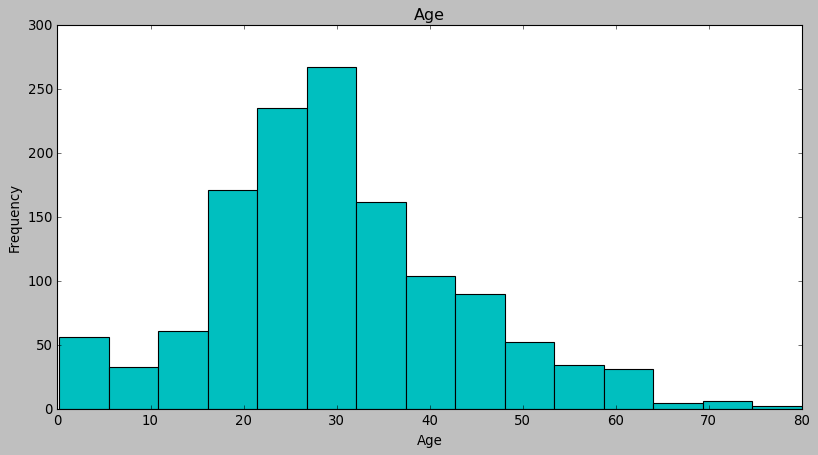

In [7]:
# your code here
plt.hist('Age', data = titanic, color = 'c', bins = 15)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency');

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

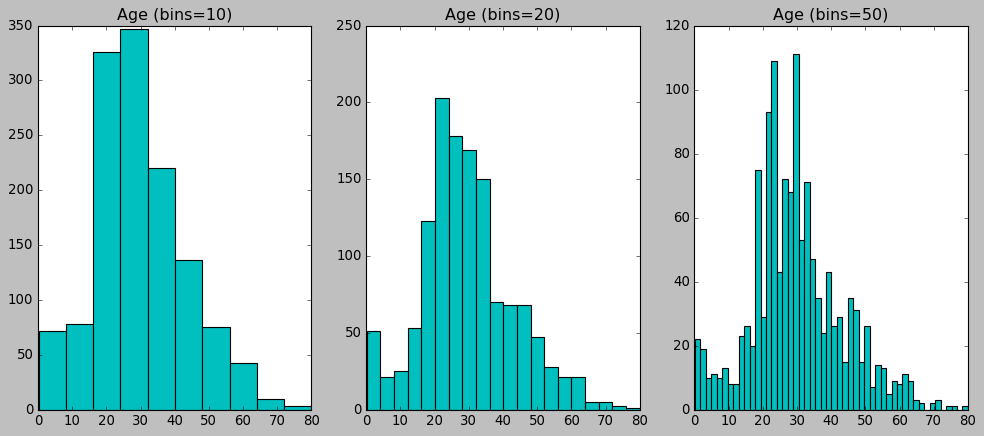

In [8]:
# your code here
bins = [10, 20, 50]

fig, axes = plt.subplots(1, 3, figsize=(15,6))

for i in range(len(bins)):
    plt.sca(axes[i])
    plt.hist('Age', data = titanic, bins = bins[i], color='c')
    plt.title(f'Age (bins={bins[i]})')

#### Whether the bin size affects your plot? Why?

Entre pocos intervalos, las edades que abarcan son de un rango grande, incluso la distribución puede no ser tan clara, sin embargo, con muchos intervalos, cada intervalo puede ser muy especifico y de igual forma la distribución comienza a no ser tan clara

#### Use seaborn to show the distribution of the column `Age`

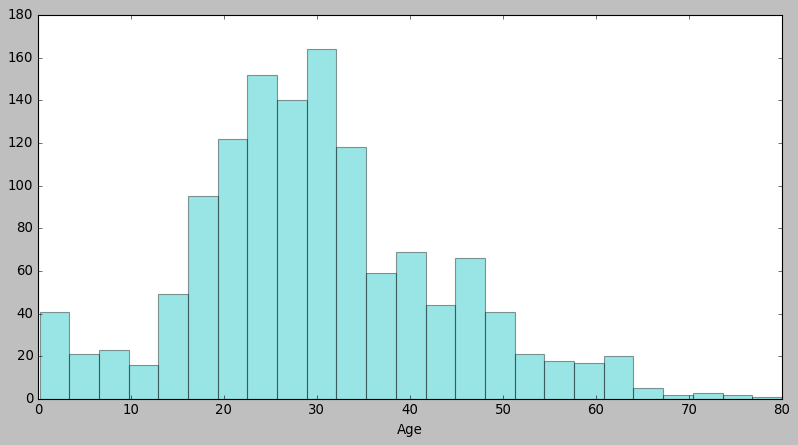

In [9]:
# your code here
sns.distplot(titanic['Age'], bins=25, kde=False, color='c');

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

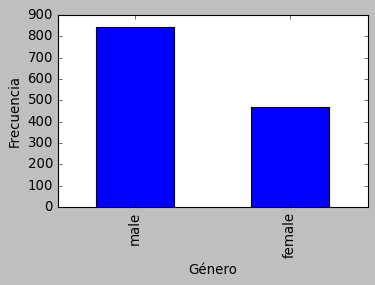

In [10]:
# your code here- 1st way
titanic['Gender'].value_counts().plot(kind='bar', figsize=(5,3))
plt.xlabel('Género')
plt.ylabel('Frecuencia');

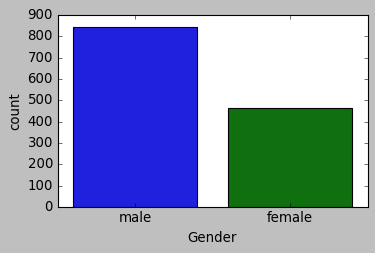

In [11]:
# your code here- 2nd way
fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(x='Gender', data=titanic);

#### Use the appropriate plot to visualize the column `Pclass` 


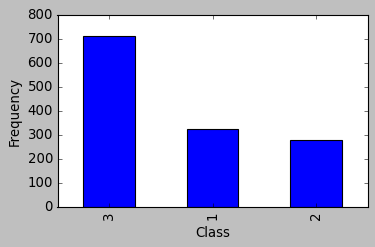

In [12]:
# your code here
titanic['Pclass'].value_counts().plot(kind='bar', figsize=(5, 3))
plt.xlabel('Class')
plt.ylabel('Frequency');

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

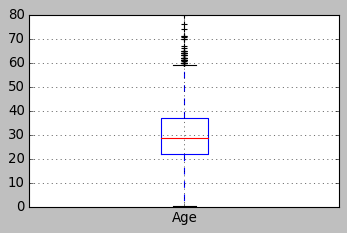

In [13]:
# your code here
titanic.boxplot(column='Age', figsize = (5, 3));

#### What does the previous plot tell you about the feature `Age`? Comment.

De la gráfica anterior se observa que:
- El 50% de las personas tienen una edad comprendida entre 22 y 38 años proximadament.
- Existen registros con edad = 0.
- La mediana de la edad es aproximadamente 29 años.
- La edad máxima es 80 aprox.

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

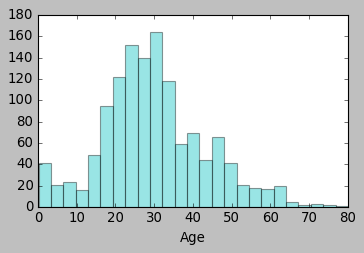

In [14]:
#your code here
fig, ax =  plt.subplots(figsize=(5, 3))
sns.distplot(titanic['Age'], bins=25, kde=False, color='c');

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

La distribución de la edad, está cargada ligeramente a la izquierda.


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

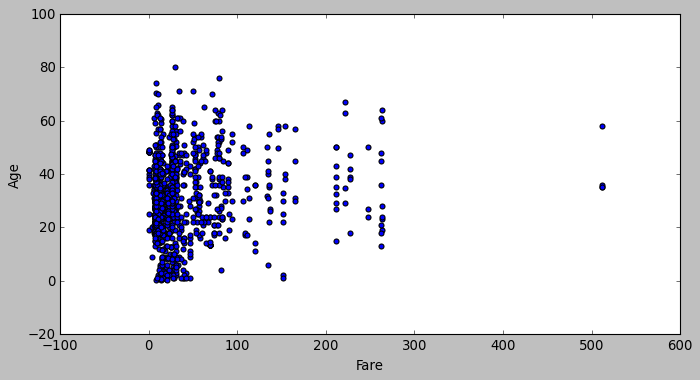

In [15]:
#your code-1st way
fig, ax = plt.subplots( figsize=(10,5))
plt.scatter(x='Fare', y='Age', data = titanic)
plt.xlabel('Fare')
plt.ylabel('Age');

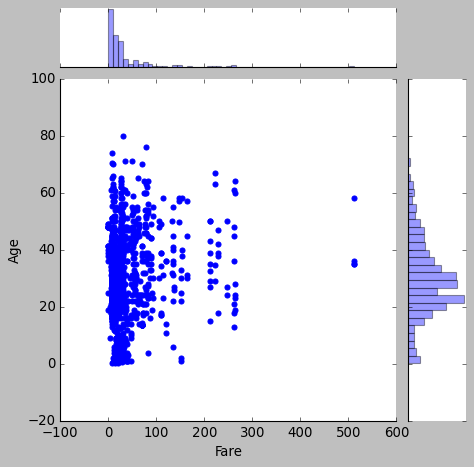

In [16]:
# your code-2nd way
g =sns.jointplot(x='Fare', y='Age', data=titanic);

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

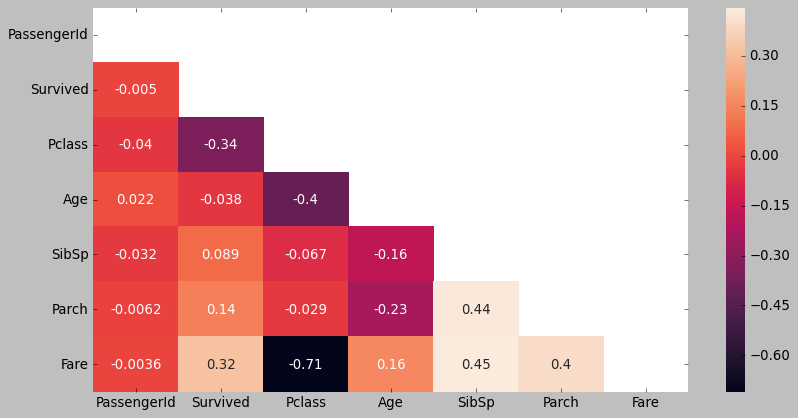

In [17]:
#your code here
corr = titanic.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype = np.bool))
sns.heatmap(corr,  annot=True, mask = mask);

#### According to the previous plot, what are the most correlated feature? Comment.


las variables Pclass y Fare poseen una correlación negativa significativa.
Por otro lado, las variables SibSp y Fare poseen la correlación más alta de las correlaciones positivas.

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

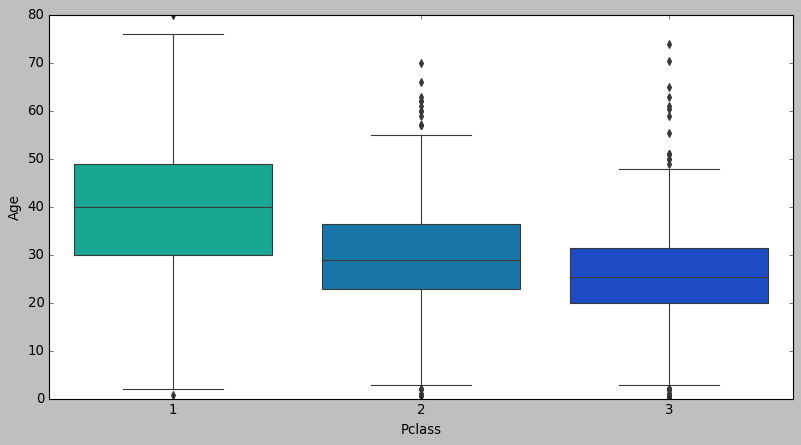

In [18]:
#your code here
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='winter_r');

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

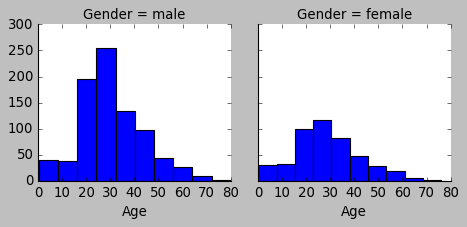

In [19]:
#your code here
f = sns.FacetGrid(data=titanic, col='Gender')
f.map(plt.hist,'Age');